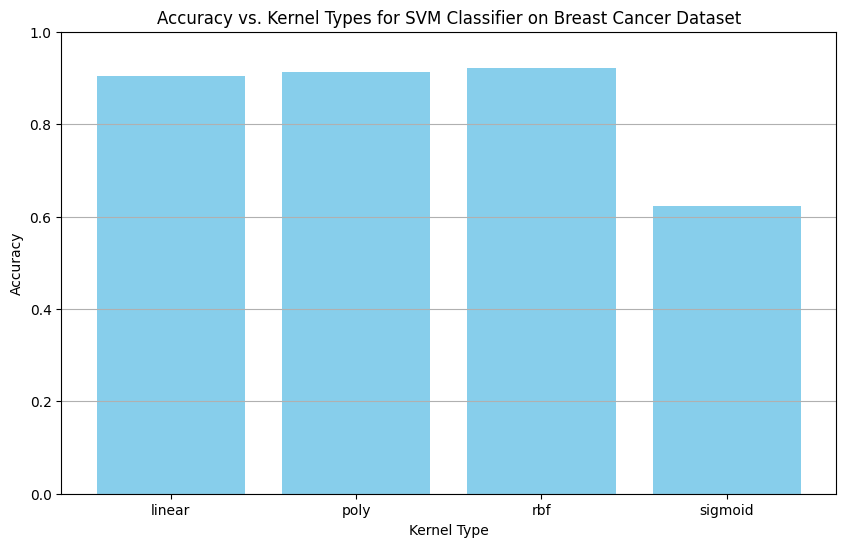

Best Kernel: rbf
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



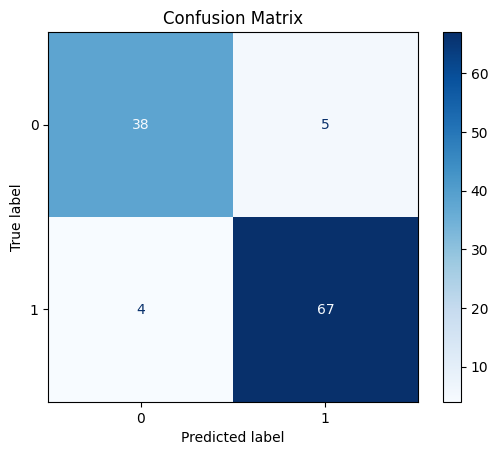

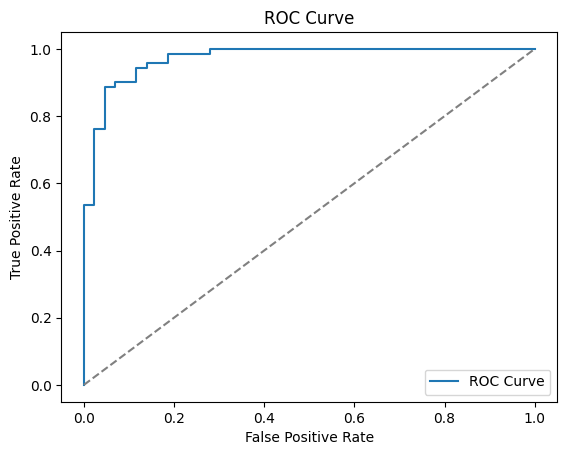

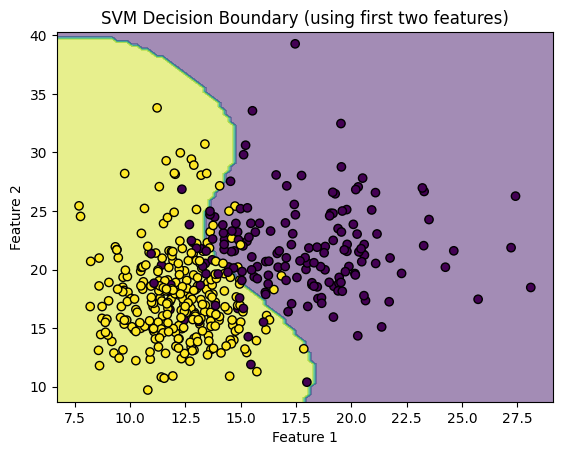

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    ConfusionMatrixDisplay,
)

data = datasets.load_breast_cancer()
X, y = data.data, data.target
X = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for kernel in kernels:
    model = svm.SVC(kernel=kernel, probability=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.bar(kernels, accuracies, color='skyblue')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Kernel Types for SVM Classifier on Breast Cancer Dataset')
plt.ylim(0, 1)  
plt.grid(axis='y')
plt.show()

best_kernel = kernels[np.argmax(accuracies)]
print(f"Best Kernel: {best_kernel}")

final_model = svm.SVC(kernel=best_kernel, probability=True)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

y_prob = final_model.predict_proba(X_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_prob)  
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

def plot_decision_boundary(model, X, y):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100),
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title("SVM Decision Boundary (using first two features)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(final_model, X_train, y_train)

In [2]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 598.5 kB/s eta 0:00:02
   --------------- ------------------------ 0.5/1.4 MB 598.5 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 578.7 kB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 578.7 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 636.8 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 636.8 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 634.2 kB/s eta 0:00:00


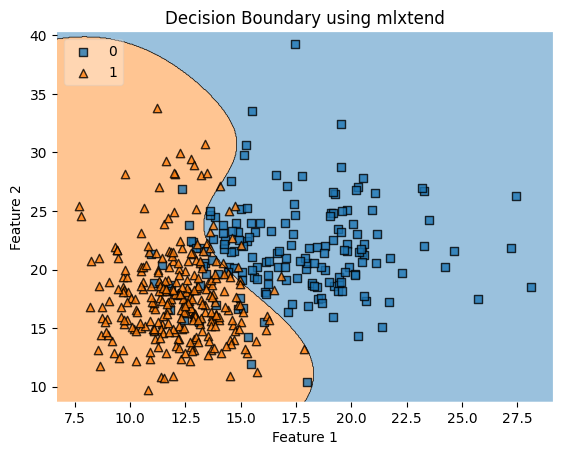

In [3]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Make sure X has only 2 features
plot_decision_regions(X=X_train, y=y_train, clf=final_model, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary using mlxtend')
plt.show()
